In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ShowImage(img):
    plt.axis("off")
    plt.imshow(img, cmap='gray')
    plt.show()

In [3]:
def scale_image(img, T):
    r,c = img.shape
    out = np.zeros_like(img, dtype='u1') 
    sx = T[0]
    sy = T[1]
    ts = np.array([[sx, 0],[0, sy]])
    for i in range(r):
        for j in range(c):
            x = j
            y = i
            xy = np.array([x, y])
            new_xy = np.dot(ts, xy)  #(xn, yn)
            xn = int(new_xy[0])
            yn = int(new_xy[1])
            if 0 <= xn < c and 0 <= yn < r:
                out[yn,xn] = img[y,x]
    return out.astype(np.uint8)


In [4]:
img = cv2.imread("./images/cameraman.png", 0)

In [5]:
h, w = img.shape
#shift = (int(w/2),int(h/2)) # (tx,ty)
#shift = (int(w/2),int(h/2)) # (tx,ty)
shift = (0.5, 0.5)
ts_img = scale_image(img, shift)

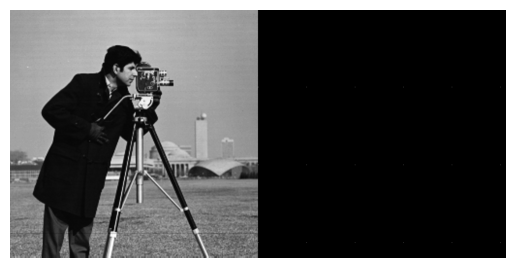

In [6]:
mul_img = cv2.hconcat([img, ts_img])
ShowImage(mul_img)